In [1]:
from sympy import *
from sympy.physics.quantum import Dagger, TensorProduct, Operator
from sympy.physics.matrices import msigma
from sympy.utilities.autowrap import ufuncify
import matplotlib.pyplot as plt
from IPython.display import *
from scipy.optimize import brenth
%matplotlib inline
init_printing()

In [2]:
p = Symbol("p", real=True, nonnegative=True, positive=True)
A0= sqrt(1-3*p/4)*Identity(2).as_explicit()
A1= sqrt(p)/2*msigma(1)
A2= sqrt(p)/2*msigma(2)
A3= sqrt(p)/2*msigma(3)
I_half = Identity(2).as_explicit()/2
rho = MatrixSymbol("rho",2,2)

In [3]:
U = Matrix([[A0],[A1],[A2],[A3]]);
U_Dagger = Matrix([[Dagger(A0)],[Dagger(A1)],[Dagger(A2)],[Dagger(A3)]]).transpose()

# Problem 5
## (a)
Using the fact that $\left<Tr_2 (U \rho U^\dagger)\right>_{ij} = Tr(A_i \rho A_j^\dagger)$, we can compute $Tr_2 (U \rho U^\dagger)$.

In [4]:
rho_sub = rho.as_explicit()
K=(U*Matrix([[rho_sub]])*U_Dagger)
K = K.subs(rho, rho_sub)
K = simplify(K)
K = K.applyfunc(trace)
K = simplify(K)
K= K.subs(rho[0]+rho[3],1)
K=K.subs(adjoint(sqrt(-3*p+4)),sqrt(-3*p+4))
display(Math(r"B_p(\rho)=Tr_2 (U \rho U^\dagger)="))
K

<IPython.core.display.Math object>

⎡                                    __________                     __________
⎢            3⋅p                √p⋅╲╱ -3⋅p + 4 ⋅(ρ₀₁ + ρ₁₀)  ⅈ⋅√p⋅╲╱ -3⋅p + 4 
⎢          - ─── + 1            ───────────────────────────  ─────────────────
⎢             4                              4                             4  
⎢                                                                             
⎢      __________                                                             
⎢ √p⋅╲╱ -3⋅p + 4 ⋅(ρ₀₁ + ρ₁₀)                p                     ⅈ⋅p⋅(-ρ₀₀ +
⎢ ───────────────────────────                ─                     ───────────
⎢              4                             4                            4   
⎢                                                                             
⎢       __________                                                            
⎢ⅈ⋅√p⋅╲╱ -3⋅p + 4 ⋅(ρ₀₁ - ρ₁₀)        ⅈ⋅p⋅(ρ₀₀ - ρ₁₁)                      p  
⎢─────────────────────────────        ──────────────

We can find the two Kraus operators $B_1$ and $B_2$.

In [32]:
B1 = Matrix([[sqrt(-3*p/4+1),0],[0,sqrt(p)/2],[0,-I*sqrt(p)/2],[sqrt(p)/2,0]])
B2 = Matrix([[0,sqrt(-3*p/4+1)],[sqrt(p)/2,0],[I*sqrt(p)/2,0],[0,-sqrt(p)/2]])

In [33]:
display(Math(r"B_1=")); B1

<IPython.core.display.Math object>

⎡    ___________        ⎤
⎢   ╱   3⋅p             ⎥
⎢  ╱  - ─── + 1     0   ⎥
⎢╲╱      4              ⎥
⎢                       ⎥
⎢                   √p  ⎥
⎢       0           ──  ⎥
⎢                   2   ⎥
⎢                       ⎥
⎢                 -ⅈ⋅√p ⎥
⎢       0         ──────⎥
⎢                   2   ⎥
⎢                       ⎥
⎢      √p               ⎥
⎢      ──           0   ⎥
⎣      2                ⎦

In [34]:
display(Math(r"B_2=")); B2

<IPython.core.display.Math object>

⎡          ___________⎤
⎢         ╱   3⋅p     ⎥
⎢ 0      ╱  - ─── + 1 ⎥
⎢      ╲╱      4      ⎥
⎢                     ⎥
⎢ √p                  ⎥
⎢ ──          0       ⎥
⎢ 2                   ⎥
⎢                     ⎥
⎢ⅈ⋅√p                 ⎥
⎢────         0       ⎥
⎢ 2                   ⎥
⎢                     ⎥
⎢           -√p       ⎥
⎢ 0         ────      ⎥
⎣            2        ⎦

Verification:

In [36]:
display(Math(r"B_1 \rho B_1^\dagger+B_2 \rho B_2^\dagger="))
K2 = simplify(B1*rho.as_explicit()*Dagger(B1)+B2*rho.as_explicit()*Dagger(B2))\
.subs(rho[0]+rho[3],1).subs(adjoint(sqrt(-3*p+4)),sqrt(-3*p+4)); K2

<IPython.core.display.Math object>

⎡                                    __________                     __________
⎢            3⋅p                √p⋅╲╱ -3⋅p + 4 ⋅(ρ₀₁ + ρ₁₀)  ⅈ⋅√p⋅╲╱ -3⋅p + 4 
⎢          - ─── + 1            ───────────────────────────  ─────────────────
⎢             4                              4                             4  
⎢                                                                             
⎢      __________                                                             
⎢ √p⋅╲╱ -3⋅p + 4 ⋅(ρ₀₁ + ρ₁₀)                p                     ⅈ⋅p⋅(-ρ₀₀ +
⎢ ───────────────────────────                ─                     ───────────
⎢              4                             4                            4   
⎢                                                                             
⎢       __________                                                            
⎢ⅈ⋅√p⋅╲╱ -3⋅p + 4 ⋅(ρ₀₁ - ρ₁₀)        ⅈ⋅p⋅(ρ₀₀ - ρ₁₁)                      p  
⎢─────────────────────────────        ──────────────

In [41]:
display(Math(r"Tr_2 (U \rho U^\dagger)=B_1 \rho B_1^\dagger+B_2 \rho B_2^\dagger :"))
print( K==K2)

<IPython.core.display.Math object>

True


In [5]:
def B(m):
    K=(U*Matrix([[m]])*U_Dagger)
    K = simplify(K)
    K = K.applyfunc(trace)
    K = simplify(K)
    K=K.subs(adjoint(sqrt(-3*p+4)),sqrt(-3*p+4))
    return K

Compute $B(I/2)$, and we have

In [6]:
display(Math(r"B_p(I/2)="))
B(I_half)

<IPython.core.display.Math object>

⎡  3⋅p             ⎤
⎢- ─── + 1  0  0  0⎥
⎢   4              ⎥
⎢                  ⎥
⎢           p      ⎥
⎢    0      ─  0  0⎥
⎢           4      ⎥
⎢                  ⎥
⎢              p   ⎥
⎢    0      0  ─  0⎥
⎢              4   ⎥
⎢                  ⎥
⎢                 p⎥
⎢    0      0  0  ─⎥
⎣                 4⎦

## (b)

In [7]:
def A(m):
    M= A0*m*Dagger(A0) + A1*m*Dagger(A1)+ A2*m*Dagger(A2)+A3*m*Dagger(A3)
    M = M.subs(adjoint(sqrt(-3*p/4+1)),sqrt(-3*p/4+1))
    return M

In [14]:
def logM(m):
    def log2(a):
        if a ==0:
            return 0
        else:
            return log(a, 2)
    P,D = m.diagonalize()
    P = simplify(P)
    D = simplify(D)
    R = simplify(P*D.applyfunc(log2)*P.inv())
    return simplify(R)
def S(m):
    return -simplify(trace(m*logM(m)))

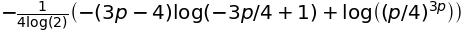

In [43]:
S(B(I_half))

Using the results shown above, we can now compute $I_C (I/2, A_p)$, and we get

<IPython.core.display.Math object>

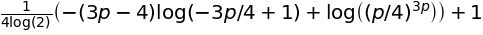

In [15]:
IC = S(A(I_half)) - S(B(I_half))
display(Math(r"I_C (I/2, A_p)="))
IC

In [16]:
IC_u = ufuncify(p,IC)

In [17]:
import numpy as np

In [18]:
x = np.linspace(0,1)
y = IC_u(x)

Ploting the $I_C (I/2, A_p)$ versus $p$, we have the figure shown below. Solve for the root numerically, and we get $I_C(I/2, A_{p=0.252})=0$.

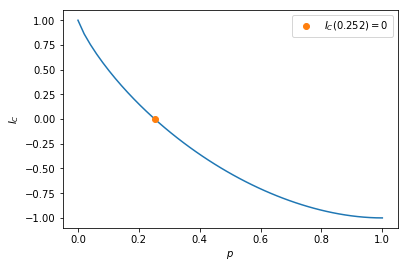

In [19]:
plt.plot(x,y)
plt.ylabel(r"$I_C$")
plt.xlabel(r"$p$")
r = brenth(IC_u,0,1)
plt.plot(r, 0,'o', label=r"$I_C(%.3f)=0 $"%r)
plt.legend()
plt.show()